# Project: Gradients and Solvers

## Machine Learning, Fall 2021

### Name: Michael Hlavaty

### Sources
* _Add any and all sources here, including peers with whom your worked, websites, and other resources used._
* Peers:
    * Glen Cahilly '23
    * Michael Huang '23 
    * Julian Reed '23
* Online materials:
    * https://bdtechtalks.com/2020/07/27/black-box-ai-models/
    * https://www.w3schools.com/python/ref_random_seed.asp
    * https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer
    * https://github.com/nzufelt/jupyter_notebooks_ML_2018/blob/master/lessons/Basics%20of%20Supervised%20Learning.ipynb
    * https://github.com/nzufelt/jupyter_notebooks_ML_2018/blob/master/lessons/Linear%20and%20Logistic%20Regression.ipynb
    * https://matplotlib.org/stable/contents.html

In this project, you'll perform the following tasks:

1. [Explore gradients and contour plots](#Gradients-and-Contour-Plots),
2. [Learn about the notion of a "Blackbox" algorithm](#Learning-about-the-black-box)
2. [Define a `Variable` class](#The-Variable-class) which is used to compute the gradient of an "arbitrary" function,
3. [Test out your `Variable` class](#A-basic-test-of-your-Variable-class) by plotting some more gradients on contour plots, 
4. [Build and test a `LogisticRegression` class](#The-LogisticRegression-class) using your `Variable` class, and 
6. [Explore your fit model to ask questions about the black box](#Exploring-the-black-box)

In [1]:
# Standard import statements:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

plt.style.use("ggplot")

## Gradients and Contour Plots

Let's begin by understanding how contour plots work.  These are 2D representations of functions of two variables (what some people might call "3D functions").  You may be familiar with [contour maps](http://sitesmedia.s3.amazonaws.com/creekconnections/files/2014/09/topomap.jpg); a contour map is simply a contour plot of the function 

$$f(\text{lattitude}, \text{longitude}) = \left<\text{height of the Earth's surface above sea level at that point}\right>.$$ 

More generally, the contours in a plot are the paths of same height.  Thus, traveling perpendicularly to a contour means traveling "straight up or down the mountain".  Here's a first attempt at making a contour plot for a function which somewhat resembles the top of a mountain:

Exception was raised: 
TypeError: Input z must be 2D, not 1D


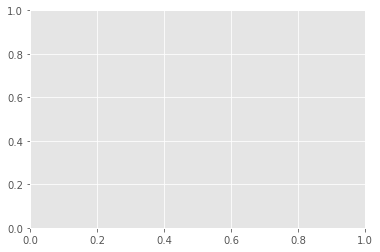

In [2]:
def f(x,y):
    return 1.2 - 0.2*x**2 - 0.3*y**2 + 0.1 * x * y - 0.25 * x

x = np.arange(-8,8,.1)
y = np.arange(-8,8,.1)

# maybe a first guess is:
z = f(x,y)

try:
    plt.contour(x, y, z);
except Exception as e:
    print("Exception was raised: \n", type(e).__name__, ": ", e, sep='')

That doesn't work, because this only plugs values into $f$ which are on the *diagonal*, that is, those values in the $xy$-plane where $x=y$.  In order to make this work, we need a function value over every point in our grid, i.e. every pair of $x$- and $y$-values in the square.  This is why the value for z must be 2D, because its indices `i` and `j` are the indices of its $x$- and $y$-values of its point.  That is, `z[i,j] = f(x[i], y[j])`.

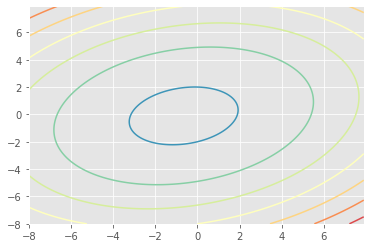

In [3]:
# Better, but super confusing. Try to parse this line:
z = np.array([[f(x[i],y[j]) for i in range(x.shape[0])] for j in range(y.shape[0])])

try:
    plt.contour(x, y, z, cmap='Spectral');
except Exception as e:
    print(e)

That works, but that line defining `z` sure was a slog.  This is where the helper function `np.meshgrid` comes into play:

In [4]:
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

# Convenience for printing 
iters = [('x', x), ('X', X), ('y', y), ('Y', Y), ('z', z) , ('Z', Z)]

for name, var in iters:
    print("The shape of {} is {}".format(name, var.shape))

if (z == Z).all():
    print("\nThese ways work the same")

The shape of x is (160,)
The shape of X is (160, 160)
The shape of y is (160,)
The shape of Y is (160, 160)
The shape of z is (160, 160)
The shape of Z is (160, 160)


So `np.meshgrid` is used to build this `Z` (which is the same as our manually-built `z`).  But what are `X` and `Y`?

In [5]:
## Make sure you understand what the following code is doing!  It will help with understanding X and Y.

for name, var in iters[:4]:
    try:
        snipped = var[:6, :6]
    except:
        snipped = var[:6]
    print('Beginning of {}:\n{}'.format(name, snipped), end='\n\n')

Beginning of x:
[-8.  -7.9 -7.8 -7.7 -7.6 -7.5]

Beginning of X:
[[-8.  -7.9 -7.8 -7.7 -7.6 -7.5]
 [-8.  -7.9 -7.8 -7.7 -7.6 -7.5]
 [-8.  -7.9 -7.8 -7.7 -7.6 -7.5]
 [-8.  -7.9 -7.8 -7.7 -7.6 -7.5]
 [-8.  -7.9 -7.8 -7.7 -7.6 -7.5]
 [-8.  -7.9 -7.8 -7.7 -7.6 -7.5]]

Beginning of y:
[-8.  -7.9 -7.8 -7.7 -7.6 -7.5]

Beginning of Y:
[[-8.  -8.  -8.  -8.  -8.  -8. ]
 [-7.9 -7.9 -7.9 -7.9 -7.9 -7.9]
 [-7.8 -7.8 -7.8 -7.8 -7.8 -7.8]
 [-7.7 -7.7 -7.7 -7.7 -7.7 -7.7]
 [-7.6 -7.6 -7.6 -7.6 -7.6 -7.6]
 [-7.5 -7.5 -7.5 -7.5 -7.5 -7.5]]



<div style="background-color: #EFDDFF; padding: 10px">
<p>Describe what you're seeing:</p>
</div>

<div style = "background-color: #fac6ac; padding: 10px">
I am seeing a slice of the output of `np.meshgrid`

- Each value in x is the same as each column of X at the value's index.
     - For example, x[0] = -8. Therefore, all the values of X[:,0] are -8.
- Each value in y is the same as each value in a row for Y. The index of the value in y corresponds to the index of the row in Y whose values will be that of the y value.
     - For example, y[0] = -8. Therefore, all of the values of Y[0,] are -8.
- The values are in increments of 0.1. This is because x and y were created with the `np.arange(-8, 8, 0.1)` method where the increment was by 0.1. This also means that the highest and lowest values in x, X, y, Y, are 8 and -8, respectively.
- The shapes of X and Y are both 6x6 because they were sliced as the first 6 rows and columns of x and y, respectively.
- Together, (X[i,j], Y[i,j]), these arrays form coordinates that can be plotted

Okay, so now that we know how to plot contour plots of functions of 2 variables, let's explore adding some **gradients** to the plot.  First we define a helper function, used to help us draw the arrows on contour plots

In [6]:
def draw_arrow(a, b, c, d, ax=None):
    """ Draw an arrow on a plot.
    
    params:
        a, b -- coordinates of the base of the arrow
        c, d -- vector corresponding to the arrow (starting at the origin)
        ax   -- the matplotlib Axes object on which to draw the arrow.  If none, set to current Axes object.
    """
    ax = ax or plt.gca()
    v_0 = np.array([a,b])
    v_1 = np.array([c,d]) + v_0
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='k')
    plt.annotate('', v_1, v_0, arrowprops=arrowprops)

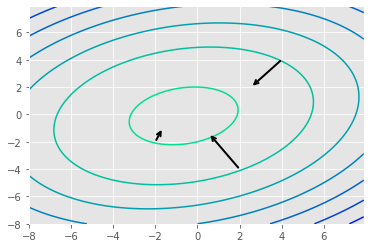

In [7]:
# Plot the contour plot as well as some gradient vectors
x = np.arange(-8,8,.1)
y = np.arange(-8,8,.1)

X, Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.contour(x, y, Z, cmap='winter')

# Draw some gradients
draw_arrow(2, -4, -1.45,  2.6)
draw_arrow(-2, -2, 0.35, 1)
draw_arrow(4, 4, -1.45, -2)

<div style="background-color: #EFDDFF; padding: 10px;">
<p> Okay, so now here's your task. The gradient of the above function happens to be:
$$\nabla f(x,y) = \left<-.4 x + .1 y - .25, -.6 y + .1 x\right>.$$ 

What this means is: at any point $(x, y)$, the gradient is a vector whose $x$- and $y$-components are given by the right-hand side of the equation. You don't need to know how to compute that gradient.
    
Create a function `draw_gradient` that, given a point $(x,y)$, draws the gradient of $f$ at that point.  Then, in the same cell below, recreate the above plot so that your `draw_gradient` method gets called for a handful of randomly-generated points (so that you can rerun the cell and get a new handful of gradient vectors drawn each time).</p>
</div>

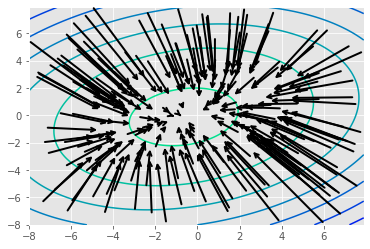

In [8]:
# Good luck!
import random
def draw_gradient(x, y):
    x_comp = -0.4*x+0.1*y-0.25
    y_comp = -0.6*y+0.1*x
    draw_arrow(x,y,x_comp,y_comp)

plt.contour(x, y, Z, cmap = 'winter')
for i in range(200):
    draw_gradient(random.uniform(-8,8),random.uniform(-8,8))

<div style="background-color: #EFDFDF; padding: 10px;">

<h3> Rules for Gradients:</h3>

<p>As we have seen, the gradient is a function that points us "up the hill", in the direction of steepest increase of a function $f$.  What does that mean?  It's important to keep in mind that if you have a function $f$ then the gradient of $f$, written as $\nabla f$, is a different function that takes in points from the same space $f$ does and outputs a vector which points up toward the direction of steepest increase at that point.</p>

<p>Below are all the rules that we will need for our gradients.  In a multivariable calculus class, you would study and possibly even prove these statements.  For us, we'll take them as our programming requirements: the gradient is simply a recursive function with a bunch of rules.  <strong>Do not feel like you need to memorize these for my class, or understand where they come from. I will never ask you to compute the gradient of a function by hand.</strong></p>

<ul>
<li> If $x_i$ is the $i^{\text{th}}$ independent variable, then $\nabla x_i = \left<0,\ldots,0,1,0,\ldots, 0\right>$, where the $1$ is in the $i^{\text{th}}$ slot.  Another way to say this is the following.  Suppose my function $f$ just picked out the $i^{\text{th}}$ variable: $f(x_1, \ldots, x_p)=x_i$, for some $i$.  Then the gradient of $f$ would be length 1 and would point in the $x_i$-direction.</li>
<li> The gradient is <strong>linear</strong>: </li><ul>
 <li> If $f(x_1, \ldots, x_p) = w_1+w_2$, then $\nabla f = \nabla w_1 + \nabla w_2$, and </li>
 <li> If $f(x_1, \ldots, x_p) = c \cdot w$, then $\nabla f = c \cdot \nabla w$.</li>
 <li> (As an extension of the first point: if $f(x_1, \ldots, x_p) = \sum_{i=1}^n w_i$, then $\nabla f = \sum_{i=1}^n\nabla w_i$.)</li>
 </ul>
<li> The gradient has a <strong>power rule</strong>: </li>
 <ul>
 <li> If $f(x_1, \ldots, x_p) = w^n$ then $\nabla f = n w^{n-1} \cdot \nabla w$, </li>
 </ul>
<li> The gradient has a <strong>product rule</strong>: </li>
 <ul>
 <li> If $f(x_1, \ldots, x_p) = w_1\cdot w_2$ then $\nabla f = w_1 \cdot \nabla w_2 + w_2 \cdot \nabla w_1$,</li>
 </ul>
    <li> The gradient does have a <em>difference rule</em> and a <em>quotient rule</em>, but you can just define yours using the facts that $w_1 - w_2 = w_1 + (-1) \cdot w_2$ and $\dfrac{w_1}{w_2} = w_1 \cdot (w_2)^{-1}$, respectively.</li>
<li> The gradient has a <strong>chain rule</strong>, which manifests itself in the following ways (the only ones we'll need):</li>
 <ul>
 <li> If $f(x_1, \ldots, x_p) = e^w$ then $\nabla f = e^w \cdot \nabla w$,</li>
 <li> If $f(x_1, \ldots, x_p) = \ln(w)$ then $\nabla f = \frac{1}{w} \cdot \nabla w$, </li>
 <li> There are lots of others, but we won't need them for now. </li>
 </ul>
</ul>
</div>

# Learning about the black box

One of the most common conversation points written about machine learning, and artificial intelligence more generally, is the notion that machine learning algorithms are "black boxes". Roughly, this means that the programmer creates the code which _trains_ the algorithm, runs that training code, then has _no idea_ what's going on "inside the box" of their machine learning model. Another goal for you in this project is to gain a more nuanced understanding of this argument. I want you to do a little bit of research now, and then explore later, the following questions:

* What does it mean to say that the creator of a machine learning model "doesn't know what's going on inside their algorithm"? What don't they know? _(hint: it has to do with parameters.)_
* Do machine learning model creators truly have _no idea_ what happens in their models? Perhaps, by default they don't? Or, in practice, they don't? 

You can find whatever resources you want on this topic (and if you find a resource you especially like, _definitely_ share with us all!). Here are some articles for you to explore if you need some help.

* [The dangers of trusting black-box machine learning](https://bdtechtalks.com/2020/07/27/black-box-ai-models/), by Ben Dickson
* [Code-Dependent: Pros and Cons of the Algorithm Age](https://www.pewresearch.org/internet/2017/02/08/code-dependent-pros-and-cons-of-the-algorithm-age/)By Lee Rainie and Janna Anderson. This article is HUGE, and covers many conversations. The point we're looking for in here is the last one, "Theme 7: The need grows for algorithmic literacy, transparency and oversight".
* [Machine Learning Algorithms are Not Black Boxes](https://towardsdatascience.com/machine-learning-algorithms-are-not-black-boxes-541ddaf760c3), by Zach Monge. This explores neural networks, which we haven't covered yet, but for now, just know that they are very similar to linear and logistic regression, just with thousands of parameters instead of just a handful ($m$ and $b$, or in a multidimensional version, $m_1, m_2, \ldots, m_m$, and $b$).

<div style="background-color: #EFDDFF; padding: 10px;">
    <p>Provide a reflection here about your findings.</p>
    </div>

<div style = "background-color: lightblue; padding: 10px">

**What does it mean to say that the creator of a machine learning model "doesn't know what's going on inside their algorithm"? What don't they know? (hint: it has to do with parameters.)**

The creator of a machine learning model may not "know what's going on inside their algorithm" because there are a lot of parameters and decisions being made by their model. For example, a Deep Neural Networks (DNN) takes in an input level which may include thousands of parameters. The data is then processed in the hidden layer where the "parameters combine to make decisions." It is nearly impossible for the creator to understand all of the processes and reasoning behind the thousands of combined parameters' decision making.

**Do machine learning model creators truly have no idea what happens in their models? Perhaps, by default they don't? Or, in practice, they don't?**

Firstly, creators may not be able to describe what exactly happens in their models for corporate policy reasons. The intellectual property value of some large corporations' (e.g Google, Apple, Spotify) machine learning models could be worth millions of dollars. This is a reason why they do not explain the decision making, regardless if or if not they do understand what is going on. Secondly, I think that most machine model creators understand _the theory_ behind what happens in their models. _In practice_, when thousands of parameters are being passed into their models, it becomes very difficult for the creators to keep track of what exactly is going on. One way that the model creators may follow their model's decisions is by adding additional parameters that they can control. For example, in the cells below, I implement a `probability_threshold` to manipulate my LogisticRegression model's prediction justifications.

## The `Variable` class

Your main task in the project is to make a `Variable` class.  The `Variable` class is a node in the computational graph.  It should have the following attributes and methods:

* an attribute `inputs`, a list that records which inputs the current `Variable` objects takes.  This could highly leverage your wengert list.
* an `__init__` method,
* an `eval_` method that allows you to evaluate the variable at a given value of the primitive variables,
* a `grad` method that will compute return the gradient at a given value.  Here, you should use a numpy array. This might sound scary, but the main reason is so that you can compute with them nicely, later (see my implementation of a `grad` method below).  For example, to do this for $f(x_1, x_2, x_3) = x_1$, that `Variable`'s gradient function should `return np.array([1,0,0])`
* appropriate methods/functionality to calculate the gradients and function evaluation for all the gradients defined above.
* _(Optional)_ I found it helpful to have a class attribute called `all_variables` which is a list that keeps track of all the Variable objects in the order of creation.  There are fancy technical definitions and requirements of such a list, technically called a _Wengert list_, but for you it could just be a list that holds all your `Variable` objects (so in the constructor, you should append `self` to the list). You definitely may not need this, but some people benefit from making it. 
 * If you do make this, you'll likely need a class method which resets the list to an empty list.  This allows you to redefine the expression each time you create a new computational graph. Google `@staticmethod` to see the notation.

As an example, if I were to say:

```
>>> x = Variable()
>>> y = Variable()
>>> z = x + y
```

This will create a new `Variable` class for `z`, and initialize it appropriately, and give it the ability to take its gradient.  The way we can implement this is by defining a *magic* method called `__add__`.  Magic methods in Python are what give it such a great, readable API.  Here's an example `__add__` method, based on how I set up my constructor.  Yours might be a little bit different:

```
    def __add__(self, other):
        """ Defines the functionality of the `+` operator. """
        if isinstance(other, (int, float)):
            """ The derivative of a constant is zero. """
            return Variable(inputs = [self],
                                evaluate = lambda *values: other + self.eval_(*values), 
                                grad = self.grad
                            )
        elif isinstance(other, Variable):
            """ The differential operator is linear. """
            return Variable(inputs = [self, other],
                                evaluate = lambda *values: self.eval_(*values) 
                                    + other.eval_(*values),
                                grad = lambda *values: self.grad(*values) 
                                    + other.grad(*values)
                           )
        else:
            return NotImplemented
```

See [this link](http://www.diveintopython3.net/special-method-names.html#acts-like-number) to learn about the magic methods you will need to implement.

The theory here is that you create the "ugly" `x.__add__(y)`-ish code once and only once, and then when you use the code later it's much more readable: `x + y`.  You'll need to do something like this for all the operations discussed above in the [gradients section](#-Rules-for-Gradients:).  The exception is for functions like `exp` and `log` (and if I wanted you to do other things, like `sin`, `cos`, `tan`, _etc._).  Those will need to be class methods.  They should still return a new `Variable` object.  See below for the API that they should support.

Other methods you need to implement:

* While you do need to have an `evaluate` method, if you also implement the `__call__` method (make it just call `evaluate`) then you can replace code of the form `w.evaluate(4, 2, 8.5)` with `w(4, 2, 8.5)`, which is both cleaner and looks like function notation (which is desirable because the `w`'s really can be thought of as functions of the independent variables).
* You might want to implement the `__repr__` method so that you can print out your variables (as in, just `print(x)`).  It would be especially nice if printing out a `Variable` object gave you a graph traversal of its `inputs`.  It's okay here if it looks like a tree, _i.e._ nodes get repeated.  It would be a bit too much work to make the true graph visual happen.
* You will need to implement the methods `__radd__` and `__rmul__`, _etc._ that give your `__add__` and `__mul__` method more functionality.  This allows expressions like `2 + x` instead of always requiring that a user use the `Variable` object first: `x + 2`.  In your research, you may see `__iadd__` and `__imul__`, and those you _should_ skip.

Here are some resources that may help you along the way:
* A good explanation on [Automatic Differentiation](https://pdfs.semanticscholar.org/be3d/17df872d41465dabda2fc9a9a61394658a1a.pdf) (the name of this process).  It's probably _much_ more information than you need.
* There's always [Wikipedia](https://en.wikipedia.org/wiki/Automatic_differentiation).
* Another take on [operator overloading in Python](http://blog.teamtreehouse.com/operator-overloading-python).

## A "complete" collection of uses that demonstrates the API 
Suppose my function is: 

$$f(x_1, x_2, x_3) = e^{x_1 + {x_2}^2} + 3 \cdot \ln(27 - x_1\cdot x_2 \cdot x_3).$$

Then the following code would build and test my function. The first line might be different for you, depending on how you create the `exp` and `log` functions:

```
>>> from Variable import exp, log
>>> x_1 = Variable()
>>> x_2 = Variable()
>>> x_3 = Variable()
>>> z = exp(x_1 + x_2**2) + 3 * log(27 - x_1 * x_2 * x_3)
>>> # Evaluate the function at the point (x_1, x_2, x_3) = (3, 1, 7):
>>> z(3, 1, 7)
59.9734284408284
>>> # Determine the gradient of the function at the point (x_1, x_2, x_3) = (3, 1, 7):
>>> z.grad(3, 1, 7)
array([ 51.09815003,  98.69630007,  -1.5       ])
>>> print(x_1 + x_2**2)
+(
 1: <input 1>
 2: ^2(
  <input 2>
 )
)
```
Two notes: 
1. I had to do some pencil-and-paper math on that gradient, let me know if it's not what you got!
2. The print-out is optional, but helpful!  You can make it say whatever you want.  Here, I made it list the node type, then indent the inputs of that node by one, recursively.  It almost looks a bit like [prefix notation](https://en.wikipedia.org/wiki/Polish_notation).

## Some thoughts on coding process

* I recommend that you don't actually define the class in a single cell in this notebook.  It's going to get a bit big, and it's going to be difficult to work on it together if it's in a cell on a jupyter notebook.  I believe that a better strategy for designing this class is to have a Python file `variable.py`, located in the same folder as this notebook and opened in your favorite text editor that contains your `Variable` class, and then just rerun a cell like this to reimport it here after saving over there:

In [9]:
from variable import Variable

* Then, when you change something and want to check out how it works, just rerun the above cell.
* This also makes sharing code via something like github a lot easier!
* I _highly recommend_ you begin by making everything other than gradients work, and then add gradients afterward. It will be **much** easier to understand.
* I also _highly recommend_ that you make it take in one-dimensional data at first (so that the parameters are just $m$ and $b$), and then allow for multidimensional inputs. For top marks on this assignment, one would need to add in multidimensional support, but it is a bit confusing to do so, and you will get almost complete understanding of the assignment by starting with one dimension.

In [10]:
from variable import Variable, exp, log

In [11]:
Variable.vars = 0
x_1 = Variable("x_1")
x_2 = Variable("x_2")
x_3 = Variable("x_3")
z = exp(x_1 + x_2**2) + 3 * log(27 - x_1 * x_2 * x_3)
z(x_1 = 3,x_2 = 1,x_3 = 7)
z.grad({"x_1": 3, "x_2": 1, "x_3": 7})

array([51.09815003, 98.69630007, -1.5       ])

## The `LogisticRegression` class

Now that you have the class needed for creating a gradient, it's time to put it to use.  Construct a `LogisticRegression` class that serves as a logistic regression model.  It should support the standard Scikit-Learn API:

```
>>> X,y = <some dataset consisting numpy arrays in the standard form>
>>> model = LogisticRegression()
>>> model.fit(X, y)
>>> X_test, y_true = <some test dataset in the standard form>
>>> y_preds = model.predict(X_test)
>>> from sklearn.metrics import accuracy_score
>>> accuracy_score(y_true, y_preds)
```

Use your `Variable` class in the `fit` method of your class (or wherever else seems appropriate).  Remember, you're taking the gradient of the cost function, and the cost function has as its inputs the parameters of your model.  So you should have a `Variable` for every model parameter.  You **don't** need to support multi-class predictions (as in, you can assume your output variable `y` is binary), and it is **optional** to support a multidimensional `X` (as in, perhaps my dataset has 7 predictors, and I want to be able to use your class to fit my data).

You should fit your model to some data in order to (thoroughly!) test your model.

**Note**: I recognize that you could just take the partial derivatives (or google them), but that's not the point of this project!  The goal is to struggle through both creating _and_ using your `Variable` class.

In [12]:
# Good luck!
from variable import Variable, exp, log
import math

class LogisticRegression():
    def __init__(self):
        '''
        Initializes the LogisticRegression objects
        
        Creates attributes:
        self.m = Allows the cost function to take the gradient of the cost with respect to slope
        self.b = Allows the cost function to take the gradient of the cost with respect to y-intercept
        self.m_val = The model's current best guess for slope
        self.b_val = The model's current best guess for y-intercept
        '''
        self.m = Variable(name="m")
        self.b = Variable(name="b")
        self.m_val = 0
        self.b_val = 0
    
    def get_y_hat(self, x_set):
        '''
        Calculates the predicted y_hat value in terms of the current slope and y-intercept
        
        Parameters:
        self = LogisticRegression object
        x_set = List of x-values to be used to predict y-values
        
        Returns:
        y_hats = List of Variable objects
        '''
        y_hats = [(1 / (1 + exp(-1 * (self.m * x + self.b)))) for x in x_set]
        return y_hats
    
    def predict(self, x_set, probability_threshold):
        '''
        Calculates the predicted y-value using the 'optimized' slope and y-intercept
        
        Parameters:
        self = LogisticRegression object
        x_set = List of x-values to be used to predict y-values
        probability_threshold = Float 0 <= probability_threshold <= 1, value that y_hat must meet to be classified as 0 or 1, default at 0.5
        
        Returns:
        preds = List of predicted y-values
        '''
        preds = []
        y_hats = [(1 / (1 + math.exp(-1 * (self.m_val * x + self.b_val)))) for x in x_set]
        for pred in y_hats:
            if pred >= probability_threshold:
                preds.append(1)
            else:
                preds.append(0)
        return preds
    
    def get_cost(self, x_set, y_set):
        '''
        Calculates the total cost of model with the current slope and y-intercept
        
        Parameters:
        self = LogisticRegression object
        x_set = List of x-values that will be passed in to get the predicted y-value
        y_set = List of observed y-values that will be compared with the predicted y-values
        
        Returns:
        total_cost = Float representing the total cost
        '''
        total_cost = 0
        y_hats = self.get_y_hat(x_set)
        for (y_actual, y_hat) in zip(y_set, y_hats):
            if y_actual == 0:
                total_cost -= log(1-y_hat)
            if y_actual == 1:
                total_cost -= log(y_hat)
        return total_cost
    
    def cost_grad(self, X, y):
        '''
        Calculates the gradient of the cost function with respect to the current slope and intercept values
        
        Parameters:
        self = LogisticRegression object
        X = List of x-values that will be used in calculating the total cost in get_cost()
        y = List of y-values that will be used in calculating the total cost in get_cost()
        
        Returns:
        Gradient of Variable object in the form [slope gradient, intercept gradient]
        '''
        return self.get_cost(X,y).grad({"m":self.m_val, "b":self.b_val})
    
    def fit(self, X, y):
        '''
        Uses gradient descent to fit the model
        
        Parameters:
        self = LogisticRegression object
        X = List of x-values that the model will be fitted to
        y = List of y-values that the model will be fitted to
        
        Gradient descent steps:
        **
        For a number of iterations, or, until magnitude of gradient vector < n, or cost does not change
        (1) Calculate cost of model with the current slope and intercept values
        (2) We want to move away from the peak of the cost function and towards a troph, so we multiply the gradient of the slope and intercept by a learning rate
        **
        After iterations = max iterations or ||gradient|| < n or [(cost at time x) = (cost at time x+1) (cost is not changing, found lowest cost)], model is fit with the 'best' slope and intercept values
        For this project, iterations are used
        '''
        for i in range(20000):
            #cost = self.get_cost(X,y)(m=self.m_val,b=self.b_val)
            #if i % 10000 == 0:
                #print("Cost after {} iterations: {}".format(i, cost))
            LEARNING_RATE = 0.01
            self.m_val -= LEARNING_RATE * self.cost_grad(X,y)[0]
            self.b_val -= LEARNING_RATE * self.cost_grad(X,y)[1]
        #print("\nIterations: {} \nCost: {} \nSlope: {} \nIntercept: {}".format(i, cost, self.m_val, self.b_val))

In [13]:
import random
def generate_data(seed=1, num_samples=10, noise=0.2):
    random.seed(seed)
    
    def generate_y(x):
        noise_point = random.random() < noise
        if not noise_point:
            return 1 if x > 6 else 0
        return 0 if x > 6 else 1

    ids = list(range(num_samples))
    x_set = [random.randrange(0,12) for i in ids]
    y = [generate_y(x) for x in x_set]

    return ({'x': x_set, 'y': y})

In [14]:
Variable.vars = 0
model = LogisticRegression()
train_data = generate_data(num_samples=30)
X_test = train_data['x']
y_true = train_data['y']
model.fit(X_test,y_true)

In [15]:
y_preds = model.predict(X_test,0.5)
#print("y_true: ", y_true)
#print("y_preds: ", y_preds)
accuracy_score(y_true, y_preds)

0.7666666666666667

## Exploring the black box

Now that you've got a `Variable` class that lets you build a model, and you've created a model using it, I want you to revisit the notion of a "black box" algorithm. Obviously, our model is "small" in terms of its number of parameters, but I want you to look into your code, explore your model parameters, and "interpret" your fit model. What if you had to defend, say in court, a decision made by your model? Could you fully interpret and explain your model's decision? How? (Hint, just as before, it's the parameters.)

<div style = "background-color: #81e3bc; padding: 10px">
My model is relatively basic because it does not take in many parameters. My model's decision making can be easily tracked compared to that of models that take in thousands of parameters that influence different aspects of the model's decision making. <br><br>

A critical factor of my model's decision making is the value/threshold that the y-estimated (y_hat) value must reach to be classified as 1. I added a `probability_threshold` parameter to my `predict` function
    to help me manipulate and interpret the 'strength' required for the y-estimated value to be classified as 1. If users wanted to lower the number of false positives, then they would raise the probability threshold so that the strength of y_hat would also need to be higher. Conversely, if users wanted to lower the number of false negatives, they they would decrease the probability threshold so that the strength of y_hat would not need to be very high to be classified as 1. The plots below display the effects of different levels of probability thresholds.

If I had to defend in court a decision made by model, I would be able to interpret and explain almost all of my model's decision. First, I would walk the jury through the mathematical calculations which should be rather uncontroversial. Then, I would justify the decision's 1 or 0 classification by comparing the y-estimated value to the `probability_threshold`. _This is where the decision making gets complicated_: how does one determine the probability threshold? What factors (e.g gender in the Apple Card disaster) may affect such evaluation? Are these factors fair and just? One may need to justify the training dataset (is there an appropriate amount of training data? What defines 'appropriate amount'? How was the training data generated?). Another thing that I would have to defend is, when doing gradient descent, the maximum number of iterations or the magnitude of the cost gradient. If the model's cost is still too high the model will not be as accurate as it should be. One must ask themselves, after how many iterations or how small must the cost gradient be for the model to be 'suitable'? 
    </div>

In [16]:
def graph_plots(probability_threshold, y_preds):
    '''
    Graphs the LogisticRegression model
    
    Parameters:
    probability_threshold = float, used for formatting title of graph
    y_preds = List of predicted y values returned by the predict() function
    '''
    fig, ax = plt.subplots(1, figsize=(13, 4))
    fig.subplots_adjust(wspace=1)
    ax.scatter(X_test, y_preds, s=150)
    ax.set_title("LogisticRegression Model with probability_threshold = {}".format(probability_threshold))
    ax.set_ylim([-0.05,1.05])
    
    x = np.arange(0, max(X_test),0.1)
    y_cla = 1 / (1 + np.exp(-1 * ((model.m_val * np.array(x)) + model.b_val)))
    ax.plot(x,y_cla,label='fitted line')
    ax.axhline(probability_threshold, color='g', label='probability_threshold')
    ax.legend()

### Graphs for Different Values of `probability_threshold`

#### GRAPH A: `probability_threshold` = 0.5

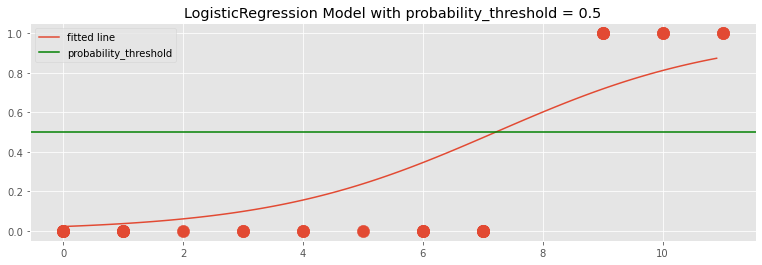

In [17]:
y_preds = model.predict(X_test, 0.5)
graph_plots(0.5, y_preds)
plt.show()

`probability_threshold` = 0.5 means that any predicted y-value needs to reach 0.5 to be classified as 1. This means that the predicted values do not need to be particularly strong to be classified as 1. The distribution of points for the graph indicates that all X-values less than 8 had predicted y-values less than 0.5

#### GRAPH B: `probability_threshold` = 0.1

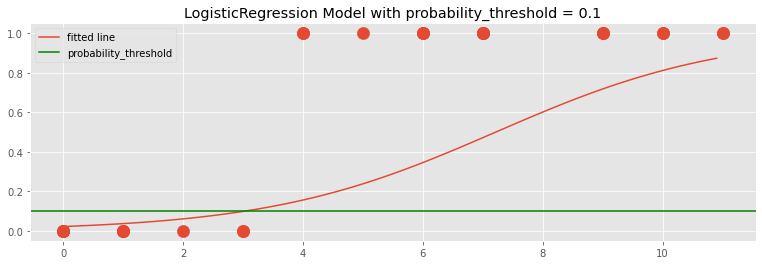

In [18]:
y_preds = model.predict(X_test,0.1)
graph_plots(0.1, y_preds)
plt.show()

`probability_threshold` = 0.1 means that any predicted y-value needs to reach 0.1 to be classified as 1. This means that the predicted values can be relatively weak to be classified as 1. The graph shows that there is an increased amount of values classified as 1 relative to Graph A because of the low probability threshold. This low threshold might be used when a user wants to minimize the number of false negatives. For example, a natural disaster tracker probably would want to minimize the number of false negatives, as it would be more important to unnecessarily prepare for a disaster (false positive) than be caught in the middle of the storm.

#### GRAPH C: `probability_threshold` = 0.9

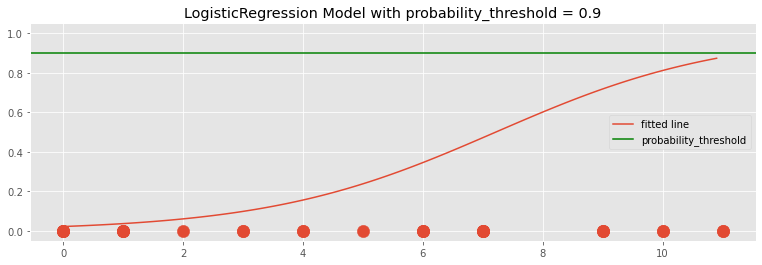

In [19]:
y_preds = model.predict(X_test,probability_threshold=0.9)
graph_plots(0.9, y_preds)
plt.show()

`probability_threshold` = 0.9 means that any predicted y-value needs to reach 0.9 to be classified as 1. This means that the predicted values need to be relatively strong to be classified as 1. The graph shows that there is greatly decreased amount of values classified as 1 relative to Graph A and Graph B because of the high probability threshold. In fact, since there are no points classfied as 1, that means that all of the predicted y-values had to be less than 0.9. This high threshold might be used when a user wants to minimize the number of false positives. For example, a medical test would want to reduce the number of false positives so that the patient isn't given the wrong treatment.

## Reflection

Before starting this project, I did not understand fundamental machine learning concepts like the "Black Box" Algorithm, Gradients, Lambda Functions, Cost Functions, and Gradient Descent. As I worked through the Variable class, I learned to work with lambda functions but still had trouble understanding the notion of gradients. By creating the `fit` method in the `LogisticRegression` class, I gained a solid introductory understanding of gradient descent. Though it may seem like I did it in a reversed order, learning gradient descent clarified gradients for me. Dr. Z's 3D sketches of a Cost Function with parameters of slope and intercept helped me understand the theory behind a cost function, and realizing the difference between the cost and its gradient when writing the `get_cost` method was also key in understanding cost functions. Lastly, I learned more about the major ethical problems behind ML models that apply the "Black Box" Algorithm and the questions that one could consider when working with their ML models and its parameters.